In [58]:
import numpy as np
from keras.utils.np_utils import to_categorical
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler


In [59]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
from keras import models
from keras import layers
from keras import regularizers
from keras.layers import Dropout

model = models.Sequential()
model.add(layers.Dense(300, activation='relu', input_shape=(144,)))
#model.add(layers.BatchNormalization())
#model.add(Dropout(0.2))
model.add(layers.Dense(100, activation='relu'))
#model.add(layers.BatchNormalization())
#model.add(Dropout(0.2))
model.add(layers.Dense(5, activation='softmax'))


In [61]:
X = np.load('/content/drive/My Drive/Colab Notebooks/ML/outputs/X_data_k_fold.npy')
np.random.shuffle(X)
y = X[:,-1]
X=X[:,:-1]

In [62]:
X.shape

(4432, 144)

In [63]:
y.shape

(4432,)

In [64]:
kfold = KFold(5, True, 1)

In [65]:
kfold

KFold(n_splits=5, random_state=1, shuffle=True)

In [66]:
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)

In [67]:
X_test_list=[]
y_test_list=[]
test_loss=[]
train_loss=[]
test_acc=[]
train_acc=[]
test_auc=[]
train_auc=[]
for train_index, test_index in kfold.split(X):
  #print('train: %s, test: %s' % (train_index, test_index))
  X_train= X[train_index]
  y_train=y[train_index]
  X_test=X[test_index]
  y_test=y[test_index]
  X_train=pd.DataFrame(data=X_train)
  y_train=pd.DataFrame(data=y_train)
  y_test=pd.DataFrame(data=y_test)
  X_test=pd.DataFrame(data=X_test)  
  one_hot_train_labels = to_categorical(y_train)
  one_hot_test_labels = to_categorical(y_test)
  X_test_list.append(X_test)
  y_test_list.append(one_hot_test_labels)
  model = models.Sequential()
  model.add(layers.Dense(300, activation='relu', input_shape=(144,)))
  #model.add(layers.BatchNormalization())
  #model.add(Dropout(0.2))
  model.add(layers.Dense(100, activation='relu'))
  #model.add(layers.BatchNormalization())
  #model.add(Dropout(0.2))
  model.add(layers.Dense(5, activation='softmax'))

  model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy', 'AUC'])
  history = model.fit(X_train, one_hot_train_labels, epochs=500, batch_size=64, validation_data=(X_test, one_hot_test_labels))
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  train_loss.append(loss)
  test_loss.append(val_loss)
  train_acc_1=history.history['accuracy']
  val_acc = history.history['val_accuracy']
  test_acc.append(val_acc)
  train_acc.append(train_acc_1)
  a=history.history['auc']
  b=history.history['val_auc']
  test_auc.append(b)
  train_auc.append(a)

流式输出内容被截断，只能显示最后 5000 行内容。
Epoch 1/500
56/56 [==============================] - 1s 12ms/step - loss: 1.4237 - accuracy: 0.3923 - auc: 0.7151 - val_loss: 1.3298 - val_accuracy: 0.4273 - val_auc: 0.7919
Epoch 2/500
56/56 [==============================] - 0s 5ms/step - loss: 1.0893 - accuracy: 0.5408 - auc: 0.8499 - val_loss: 1.0414 - val_accuracy: 0.4972 - val_auc: 0.8576
Epoch 3/500
56/56 [==============================] - 0s 5ms/step - loss: 0.9498 - accuracy: 0.5949 - auc: 0.8866 - val_loss: 1.0007 - val_accuracy: 0.5862 - val_auc: 0.8721
Epoch 4/500
56/56 [==============================] - 0s 5ms/step - loss: 0.8667 - accuracy: 0.6541 - auc: 0.9062 - val_loss: 0.8037 - val_accuracy: 0.6764 - val_auc: 0.9198
Epoch 5/500
56/56 [==============================] - 0s 5ms/step - loss: 0.7777 - accuracy: 0.7065 - auc: 0.9261 - val_loss: 0.7308 - val_accuracy: 0.7497 - val_auc: 0.9431
Epoch 6/500
56/56 [==============================] - 0s 5ms/step - loss: 0.7008 - accuracy: 0.7393 - auc: 0

In [68]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

In [69]:
np.save('/content/drive/My Drive/Colab Notebooks/ML/train_loss',train_loss)
np.save('/content/drive/My Drive/Colab Notebooks/ML/test_loss',test_loss)
np.save('/content/drive/My Drive/Colab Notebooks/ML/train_acc',train_acc)
np.save('/content/drive/My Drive/Colab Notebooks/ML/test_acc',test_acc)
np.save('/content/drive/My Drive/Colab Notebooks/ML/train_auc',train_auc)
np.save('/content/drive/My Drive/Colab Notebooks/ML/test_auc',test_auc)

In [70]:
# train_loss_min=[]
# train_loss_max=[]
# train_loss_mean=[]
# for i in range(0, 500):
#     maxv=max(train_loss[0][i],train_loss[1][i],train_loss[2][i],train_loss[3][i],train_loss[4][i], train_loss[5][i],train_loss[6][i],train_loss[7][i],train_loss[8][i],train_loss[9][i])
#     minv=min(train_loss[0][i],train_loss[1][i],train_loss[2][i],train_loss[3][i],train_loss[4][i], train_loss[5][i],train_loss[6][i],train_loss[7][i],train_loss[8][i],train_loss[9][i])
#     meanv=(train_loss[0][i]+train_loss[1][i]+train_loss[2][i]+train_loss[3][i]+train_loss[4][i]+train_loss[5][i]+train_loss[6][i]+train_loss[7][i]+train_loss[8][i]+train_loss[9][i]) /10
#     train_loss_min.append(minv)
#     train_loss_max.append(maxv)
#     train_loss_mean.append(meanv)
import matplotlib.pyplot as plt
epochs = range(1, len(loss) + 1)
train_loss_min=[]
train_loss_max=[]
train_loss_mean=[]
for i in range(0, 500):
    maxv=max(train_loss[0][i],train_loss[1][i],train_loss[2][i],train_loss[3][i],train_loss[4][i])
    minv=min(train_loss[0][i],train_loss[1][i],train_loss[2][i],train_loss[3][i],train_loss[4][i])
    meanv=(train_loss[0][i]+train_loss[1][i]+train_loss[2][i]+train_loss[3][i]+train_loss[4][i]) /5
    train_loss_min.append(minv)
    train_loss_max.append(maxv)
    train_loss_mean.append(meanv)

In [71]:
# test_loss_min=[]
# test_loss_max=[]
# test_loss_mean=[]
# for i in range(0, 500):
#     maxv=max(test_loss[0][i],test_loss[1][i],test_loss[2][i],test_loss[3][i],test_loss[4][i], test_loss[5][i],test_loss[6][i],test_loss[7][i],test_loss[8][i],test_loss[9][i])
#     minv=min(test_loss[0][i],test_loss[1][i],test_loss[2][i],test_loss[3][i],test_loss[4][i], test_loss[5][i],test_loss[6][i],test_loss[7][i],test_loss[8][i],test_loss[9][i])
#     meanv=(test_loss[0][i]+test_loss[1][i]+test_loss[2][i]+test_loss[3][i]+test_loss[4][i]+test_loss[5][i]+test_loss[6][i]+test_loss[7][i]+test_loss[8][i]+test_loss[9][i]) /10
#     test_loss_min.append(minv)
#     test_loss_max.append(maxv)
#     test_loss_mean.append(meanv)
test_loss_min=[]
test_loss_max=[]
test_loss_mean=[]
for i in range(0, 500):
    maxv=max(test_loss[0][i],test_loss[1][i],test_loss[2][i],test_loss[3][i],test_loss[4][i])
    minv=min(test_loss[0][i],test_loss[1][i],test_loss[2][i],test_loss[3][i],test_loss[4][i])
    meanv=(test_loss[0][i]+test_loss[1][i]+test_loss[2][i]+test_loss[3][i]+test_loss[4][i]) /5
    test_loss_min.append(minv)
    test_loss_max.append(maxv)
    test_loss_mean.append(meanv)

In [72]:
i=499
w = np.array([test_loss[0][i],test_loss[1][i],test_loss[2][i],test_loss[3][i],test_loss[4][i]])
s=np.std(w)
meanv=np.mean(w)
print(s, meanv)

0.03527861066098545 0.0724500935524702


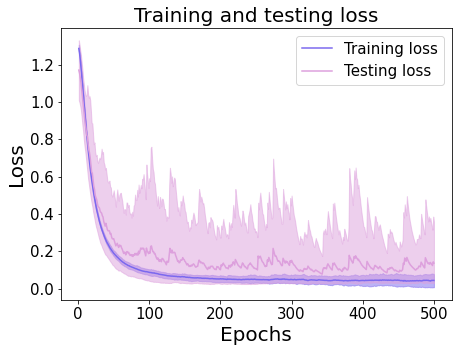

In [73]:
f=plt.figure(figsize=[7,5])
plt.plot(epochs, smooth_curve(train_loss_mean), 'k', color='mediumslateblue',label='Training loss')
plt.fill_between(epochs, smooth_curve(train_loss_min), smooth_curve(train_loss_max),alpha=0.5, edgecolor='mediumslateblue', facecolor='mediumslateblue')
plt.plot(epochs, smooth_curve(test_loss_mean), 'k', color='plum',label='Testing loss')
plt.fill_between(epochs, smooth_curve(test_loss_min), smooth_curve(test_loss_max),alpha=0.5, edgecolor='plum', facecolor='plum')
plt.title('Training and testing loss',fontsize=20)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Loss',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.savefig('/content/drive/My Drive/Colab Notebooks/ML/Trainingloss7-5.png', dpi=600)

In [74]:
train_acc_min=[]
train_acc_max=[]
train_acc_mean=[]
for i in range(0, 500):
    maxv=max(train_acc[0][i],train_acc[1][i],train_acc[2][i],train_acc[3][i],train_acc[4][i])
    minv=min(train_acc[0][i],train_acc[1][i],train_acc[2][i],train_acc[3][i],train_acc[4][i])
    meanv=(train_acc[0][i]+train_acc[1][i]+train_acc[2][i]+train_acc[3][i]+train_acc[4][i]) /5
    train_acc_min.append(minv)
    train_acc_max.append(maxv)
    train_acc_mean.append(meanv)

In [75]:
test_acc_min=[]
test_acc_max=[]
test_acc_mean=[]
for i in range(0, 500):
    maxv=max(test_acc[0][i],test_acc[1][i],test_acc[2][i],test_acc[3][i],test_acc[4][i])
    minv=min(test_acc[0][i],test_acc[1][i],test_acc[2][i],test_acc[3][i],test_acc[4][i])
    meanv=(test_acc[0][i]+test_acc[1][i]+test_acc[2][i]+test_acc[3][i]+test_acc[4][i]) /5
    test_acc_min.append(minv)
    test_acc_max.append(maxv)
    test_acc_mean.append(meanv)

In [76]:
i=499
w = np.array([test_acc[0][i],test_acc[1][i],test_acc[2][i],test_acc[3][i]])
s=np.std(w)
meanv=np.mean(w)
print(s, meanv)

0.0030330706478497336 0.9915410280227661


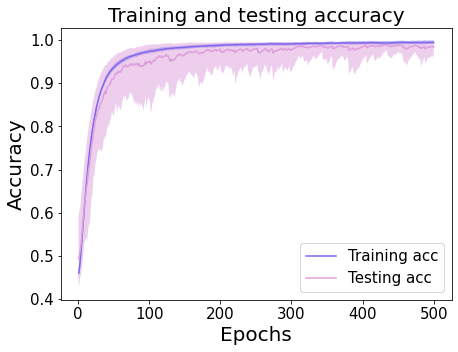

In [77]:
f=plt.figure(figsize=[7,5])
plt.plot(epochs, smooth_curve(train_acc_mean), 'k', color='mediumslateblue',label='Training acc')
plt.fill_between(epochs, smooth_curve(train_acc_min), smooth_curve(train_acc_max),alpha=0.5, facecolor='mediumslateblue')
plt.plot(epochs, smooth_curve(test_acc_mean), 'k', color='plum',label='Testing acc')
plt.fill_between(epochs, smooth_curve(test_acc_min), smooth_curve(test_acc_max),alpha=0.5, facecolor='plum')
plt.title('Training and testing accuracy',fontsize=20)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.legend(["train","test"],loc="upper left")
plt.legend(loc = 4,fontsize=15)
plt.savefig('/content/drive/My Drive/Colab Notebooks/ML/Trainingacc7-5.png', dpi=600)
plt.show()


In [78]:
train_auc_min=[]
train_auc_max=[]
train_auc_mean=[]
for i in range(0, 500):
    maxv=max(train_auc[0][i],train_auc[1][i],train_auc[2][i],train_auc[3][i],train_auc[4][i])
    minv=min(train_auc[0][i],train_auc[1][i],train_auc[2][i],train_auc[3][i],train_auc[4][i])
    meanv=(train_auc[0][i]+train_auc[1][i]+train_auc[2][i]+train_auc[3][i]+train_auc[4][i]) /5
    train_auc_min.append(minv)
    train_auc_max.append(maxv)
    train_auc_mean.append(meanv)

In [79]:
test_auc_min=[]
test_auc_max=[]
test_auc_mean=[]
for i in range(0, 500):
    maxv=max(test_auc[0][i],test_auc[1][i],test_auc[2][i],test_auc[3][i],test_auc[4][i])
    minv=min(test_auc[0][i],test_auc[1][i],test_auc[2][i],test_auc[3][i],test_auc[4][i])
    meanv=(test_auc[0][i]+test_auc[1][i]+test_auc[2][i]+test_auc[3][i]+test_auc[4][i]) /5
    test_auc_min.append(minv)
    test_auc_max.append(maxv)
    test_auc_mean.append(meanv)

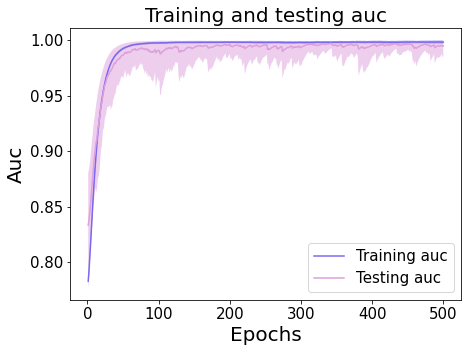

In [80]:
f=plt.figure(figsize=[7,5])
plt.plot(epochs, smooth_curve(train_auc_mean), 'k', color='mediumslateblue',label='Training auc')
plt.fill_between(epochs, smooth_curve(train_auc_min), smooth_curve(train_auc_max),alpha=0.5, facecolor='mediumslateblue')
plt.plot(epochs, smooth_curve(test_auc_mean), 'k', color='plum',label='Testing auc')
plt.fill_between(epochs, smooth_curve(test_auc_min), smooth_curve(test_auc_max),alpha=0.5, facecolor='plum')
plt.title('Training and testing auc',fontsize=20)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Auc',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.legend(["train","test"],loc="upper left")
plt.legend(loc = 4,fontsize=15)
plt.savefig('/content/drive/My Drive/Colab Notebooks/ML/Trainingauc.png', dpi=600)
plt.show()

In [81]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.RdPu):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title,fontsize=15)
    plt.clim(0, 370)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes,fontsize=12)
    plt.yticks(tick_marks, classes,fontsize=12)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label',fontsize=15)
    plt.xlabel('Predicted label',fontsize=15)
    plt.tight_layout()
